In [9]:
# import torch
# import torchvision
import scipy.io as io
# import torchreid
import matplotlib.animation as animation
import matplotlib.pyplot as plt
from IPython.display import HTML

# extra libraries
import numpy as np
import cv2
from math import comb
import copy
from skimage.filters import threshold_otsu
from skimage.segmentation import clear_border
from skimage.measure import label, regionprops
from skimage.morphology import closing, square
from skimage.color import label2rgb
import matplotlib.patches as mpatches
from skimage.restoration import denoise_bilateral

In [3]:
def _convert_grayscale(rgb):
    result = np.zeros((rgb.shape[0], rgb.shape[1], rgb.shape[-1]), dtype=int)
    for idx in range(rgb.shape[-1]):
        curr_img = rgb[:, :, :, idx]
        grayscale_img = cv2.cvtColor(curr_img, cv2.COLOR_RGB2GRAY)
        result[:, :, idx] = grayscale_img

    return result


def load_video(path):
    # load video
    video_rgb_res = io.loadmat(path)['I']  # video loaded with shape HxWx3XT where T is the total number of frames
    video_grayscale_res = _convert_grayscale(video_rgb_res)  # convert each frame of above video to grayscale
    return video_rgb_res, video_grayscale_res

In [4]:
def getSumOfDiff(image_set):
    # image_set is a set of 3 frames of size HxWx3 with each frame being a grayscale image
    # must return a sum of difference image named sod_image
    num_of_frames = image_set.shape[-1]
    denominator = comb(num_of_frames, 2)
    sod_image = np.zeros((image_set.shape[0], image_set.shape[1]))
    for idx in range(num_of_frames - 1):
        for inner_idx in range(idx + 1, num_of_frames):
            sod_image = sod_image + np.absolute(image_set[:, :, idx] - image_set[:, :, inner_idx])
    sod_image = sod_image / denominator
    return sod_image

In [ ]:
# def getDetections(sod_image):
#   # sod_image is a sum of difference image
#   # Returns a list bounding boxes of clustered motion information from sod_image
#   return bounding_boxes


In [ ]:
# def getDeepFeatures(image,bbox,model):
#
#   device = torch.device("cuda:0") if torch.cuda.is_available() else "cpu"
#   model.to(device)
#   ###########################################################################
#   ########################### FILL YOUR CODE WILL ###########################
#   ###########################################################################
#
#   # DEFINE TRANSFORM TO CONVERT TO TENSOR
#   transform =
#
#   # DEFINE FEATURES ARRAY BASED ON SIZE OF BOUNDING BOX
#   feat =
#
#   with torch.no_grad():
#     # FOR EACH BOUNDING BOX EXTRACT FEATURES, BRING TO CPU AND ADD TO feat
#     # YOU NEED TO FIRST CROP THE BOUNDING BOX PORTION OF THE IMAGE
#     # APPLY TRANSFORMS AND MAKE SURE TO REARRANGE IMAGE TO 3XHXW
#
#   # returns feat a numpy array of size N1x2048 where N1=bbox.shape[0]
#   return feat

In [ ]:
# def getMatches(feat1,feat2):
#   # feat1 and feat2 are two feature matrices of dimensions N1 x n_feat and N2 x n_feat respectively
#   # where N1 = no of bboxes in frame1 and N2 = no of bboxes in frame2
#   # returns matches a N x 2 matrix indicating the indices of matched bboxes. N <= min(N1,N2)
#
#   # YOUR CODE HERE. DO NOT CHANGE ANYTHING ABOVE THIS.
#   return matches

In [5]:
# load video
file_path = './video.mat'
video_rgb, video_grayscale = load_video(file_path)
print('RGB video size: {}, grayscale video size: {}'.format(video_rgb.shape, video_grayscale.shape))

RGB video size: (360, 640, 3, 600), grayscale video size: (360, 640, 600)


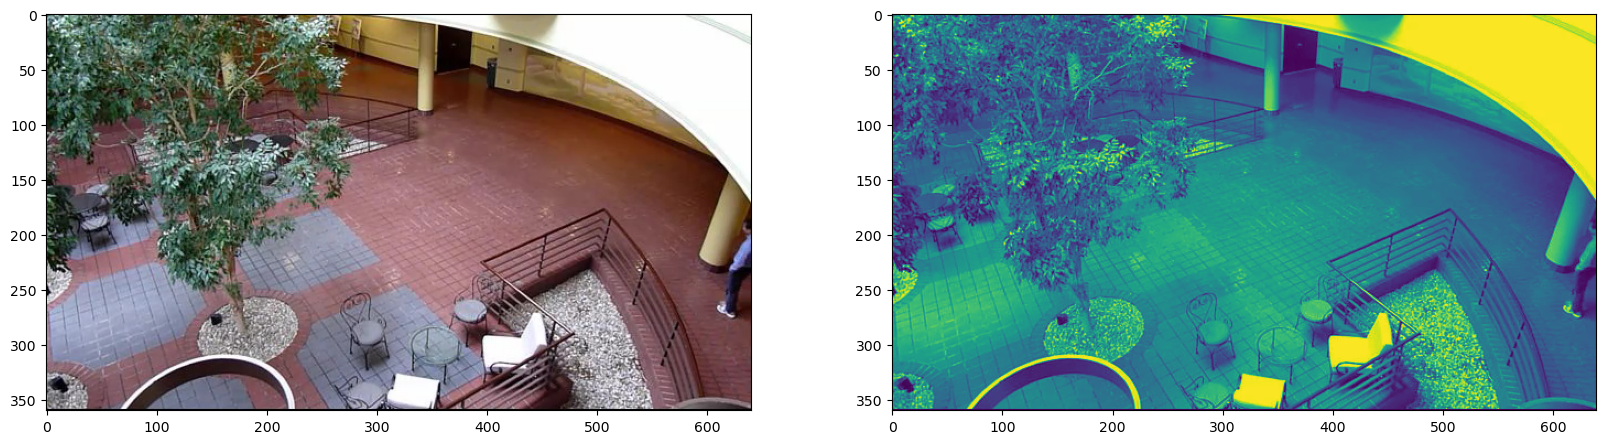

In [44]:
# display the 50th frame in both rgb and grayscale.
plt.figure(figsize=(20, 10))
plt.subplot(121)
plt.imshow(video_rgb[:, :, :, 50])
plt.subplot(122)
plt.imshow(video_grayscale[:, :, 50])
plt.show()

In [45]:
# get sample sum of difference image for 50th frame
offset = 50
D1 = getSumOfDiff(video_grayscale[:, :, offset-1:offset+2])
print('difference of frames between 49-51 size: {}'.format(D1.shape))

difference of frames between 49-51 size: (360, 640)


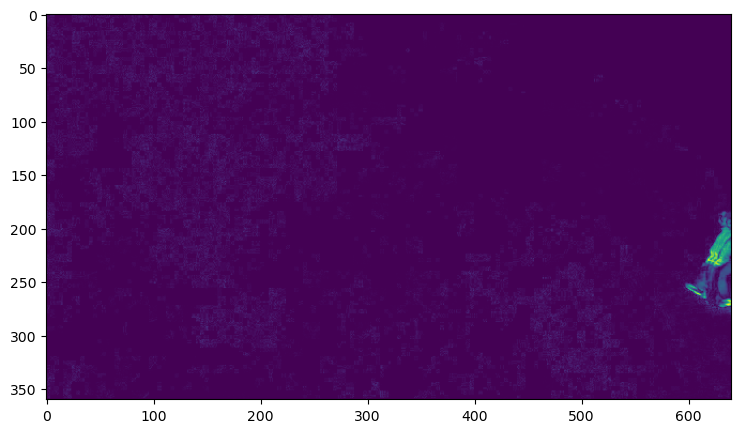

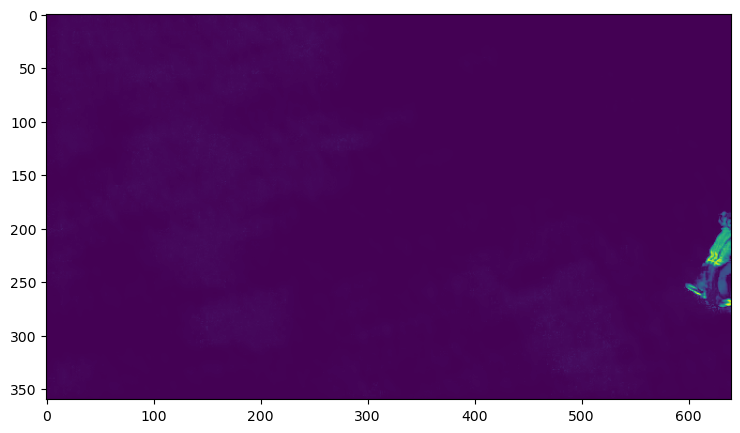

In [46]:
# write code to display D1
plt.figure(figsize=(10, 5))
plt.imshow(D1)
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(denoise_bilateral(D1.astype('uint8'), sigma_spatial=5))
plt.show()

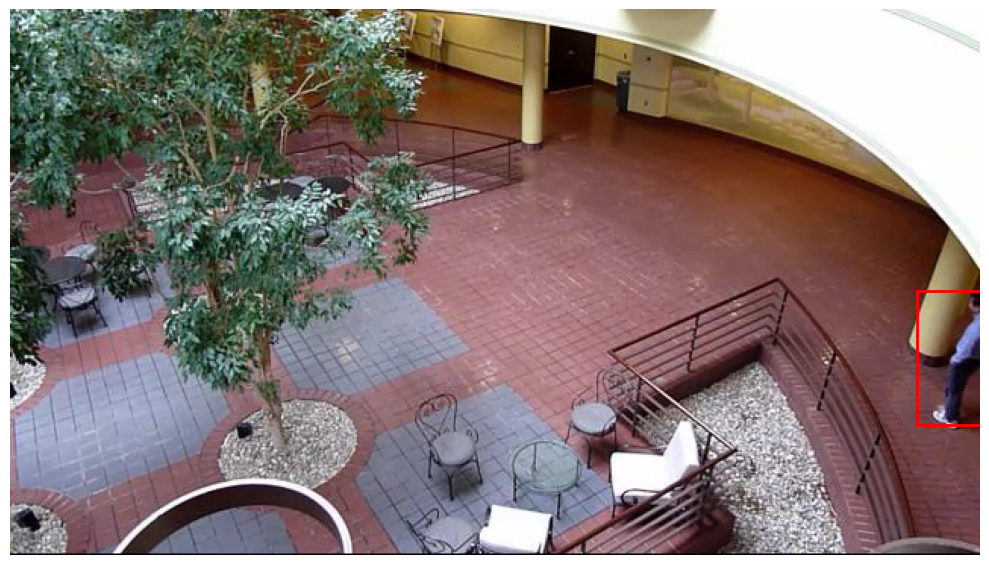

In [48]:
def _blob_detection(diff_img_arg):
    diff_img = copy.deepcopy(diff_img_arg).astype('uint8')
    diff_img = denoise_bilateral(diff_img, sigma_spatial=5)

    # apply threshold
    thresh = threshold_otsu(diff_img)
    bw = closing(diff_img > thresh, square(20))

    # label image regions
    label_image = label(bw)

    result = []
    for region in regionprops(label_image):
        # take regions with large enough areas
        if region.area >= 100:
        # draw rectangle around segmented coins
            minr, minc, maxr, maxc = region.bbox
            rect = mpatches.Rectangle((minc, minr), maxc - minc, maxr - minr,
                                      fill=False, edgecolor='red', linewidth=2)
            ax.add_patch(rect)

    ax.set_axis_off()
    plt.tight_layout()
    plt.show()

_blob_detection(D1, video_rgb[:, :, :, 50])
fig, ax = plt.subplots(figsize=(10, 6))
ax.imshow(video_rgb[:, :, :, 50])

In [ ]:
# # get bboxes for 50th frame
# bbox1 = getDetections(D1)
#
# # Write code to display bbox1 overlaying on top of video_rgb[:,:,:,50]
#
# detections = []
# detections.append((offset,bbox1)) # appends frame number and its corresponding detections
# matchings = []
# model = torchreid.models.build_model(name='resnet50',
#                                      num_classes=10,
#                                      loss='softmax',
#                                      pretrained=True
#                                     )
# # FILL CODE FOR FEATURE EXTRACTION FROM PENULTIMATE LAYER.
# # YOU NEED TO REMOVE LAST LAYER OF MODEL DEFINED ABOVE.
# # AFTER REMOVING LAST LAYER YOUR MODEL WILL OUTPUT A FEATURE OF LENGTH 2048
#
# extractor =
#
# feat1 = getDeepFeatures(video_rgb[:,:,:,offset],bbox1,extractor)
#
# for i in range(offset,video_rgb.shape[3]-2):
#
#     D2 = getSumOfDiff(video_grayscale[:,:,i:i+2])
#     bbox2 = getDetections(D2)
#
#     if len(bbox2) == 0:
#       continue
#
#     detections.append((i+1,bbox2))
#     feat2 = getDeepFeatures(video_rgb[:,:,:,i+1],bbox2,extractor)
#
#
#     M = getMatches(feat1,feat2);
#
#     if len(M) == 0:
#       continue
#
#     matchings.append((i,i+1,M)) # appends the frame t and frame t+1 with their corresponding matchings
#
#     D1 = D2;
#     bbox1 = bbox2;
#     feat1 = feat2;
#
# # Write code to display the bounding boxes frame by frame as a video using video_rgb and the list detections
# # Write code to display the matched points b/w frame t and t+1 as a video using video_rgb and the list matchings
# # use the centroid of the cooresponding matched bounding boxes as coordinates
# # for matchings display reuse your assignment1 code to get the frame t->t+1 matchings
# # refer to cell 2 for a sample animation code you need to modify it

In [ ]:
def display_video(video):
    fig = plt.figure(figsize=(5, 5))
    mov = []
    for idx in range(video.shape[3]):
        img = plt.imshow(video[:, :, :, idx], animated=True)
        plt.axis('off')
        mov.append([img])

    movie = animation.ArtistAnimation(fig, mov, interval=20, repeat_delay=1000)
    plt.close()
    return movie


HTML(display_video(video_rgb).to_html5_video())

In [ ]:
# # watershed detection
# def _watershed(diff_img, rgb_frame):
#     copy_rgb_frame = copy.deepcopy(rgb_frame)
#     copy_diff_img = copy.deepcopy(diff_img).astype('uint8')
#     ret, thresh = cv2.threshold(copy_diff_img, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
#
#     # noise removal
#     kernel = np.ones((3,3), np.uint8)
#     opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
#
#     # sure background area
#     sure_bg = cv2.dilate(opening,kernel,iterations=3)
#
#     # Finding sure foreground area
#     dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2,5)
#     ret, sure_fg = cv2.threshold(dist_transform, 0.7 * dist_transform.max(), 255, 0)
#
#     # Finding unknown region
#     sure_fg = np.uint8(sure_fg)
#     unknown = cv2.subtract(sure_bg, sure_fg)
#
#     # Marker labelling
#     ret, markers = cv2.connectedComponents(sure_fg)
#
#     # Add one to all labels so that sure background is not 0, but 1
#     markers = markers + 1
#
#     # Now, mark the region of unknown with zero
#     markers[unknown==255] = 0
#
#     expanded_grayscale = np.stack([copy_diff_img, copy_diff_img, copy_diff_img], axis=-1)
#     markers = cv2.watershed(expanded_grayscale, markers)
#     expanded_grayscale[markers == -1] = [255, 0, 0]
#
#     plt.figure(figsize=(10, 5))
#     plt.imshow(expanded_grayscale)
#     plt.show()
#
# plt.figure(figsize=(10, 5))
# plt.imshow(video_rgb[:, :, :, 50])
# plt.show()
# _watershed(D1, video_rgb[:, :, :, 50])
#
# # def _otsu_thresholding(diff_img):
# #     thresh = threshold_otsu(diff_img)
# #     otsu = diff_img < thresh
# #
# #     plt.figure(figsize=(10, 5))
# #     plt.imshow(otsu)
# #     plt.show()
# #
# #     plt.figure(figsize=(10, 5))
# #     plt.imshow(otsu * diff_img)
# #     plt.show()
# #
# # def _otsu_thresholding_v2(diff_img):
# #     copy_diff_img = copy.deepcopy(diff_img).astype('uint8')
# #     ret, thresh = cv2.threshold(copy_diff_img, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
# #
# #     # noise removal
# #     kernel = np.ones((3,3), np.uint8)
# #     otsu = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
# #
# #     plt.figure(figsize=(10, 5))
# #     plt.imshow(otsu)
# #     plt.show()
# #
# #     return otsu
#
# # def _blob_detection(otsu):
# #     # Set up the detector with default parameters.
# #     detector = cv2.SimpleBlobDetector()
# #
# #     # Detect blobs.
# #     keypoints = detector.detect(otsu)
# #
# #     # Draw detected blobs as red circles.
# #     # cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS ensures the size of the circle corresponds to the size of blob
# #     im_with_keypoints = cv2.drawKeypoints(otsu, keypoints, np.array([]), (0,0,255), cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
# #
# #     plt.figure(figsize=(10, 5))
# #     plt.imshow(im_with_keypoints)
# #     plt.show()
#
# # def _blob_detection(otsu):
# #     blobs = label(otsu)
#
# # _otsu_thresholding(D1)
# # _blob_detection(_otsu_thresholding_v2(D1))

In [ ]:
# def _instance_segmentation(diff_img):
#     copy_diff_img = copy.deepcopy(diff_img).astype('uint8')
#     ret, thresh = cv2.threshold(copy_diff_img, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
#     # noise removal
#     kernel = np.ones((3,3), np.uint8)
#     opening = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel, iterations = 2)
#
#     path_to_model = 'frozen_inference_graph_coco.pb'
#     path_to_config= 'mask_rcnn_inception_v2_coco_2018_01_28.pbtxt'
#     colors = np.random.randint(125, 255, (80, 3))
#     model = cv2.dnn.readNetFromTensorflow(path_to_model,path_to_config)
#     img=cv2.resize(diff_img, (650, 550))
#     black_image = np.zeros((img.shape[0], img.shape[1], 3), np.uint8)
#     black_image[:] = (0, 0, 0)
#     plt.figure(figsize=(10, 5))
#     plt.imshow(img)
#     plt.show()
#     img = np.stack([img, img, img], axis=-1)
#     plt.figure(figsize=(10, 5))
#     plt.imshow(img)
#     plt.show()
#     blob = cv2.dnn.blobFromImage(img, swapRB=True)
#     model.setInput(blob)
#     boxes, masks = model.forward(["detection_out_final", "detection_masks"])
#     detection_count = boxes.shape[2]
#     print(detection_count)
# _instance_segmentation(D1)